In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim

import torchvision
from matplotlib import pyplot as plt

from utils import plot_image, plot_curve, one_hot

# 加载数据集

In [7]:
batch_size = 512

train_loader = torch.utils.data.DataLoader(
torchvision.datasets.MNIST('mnist_data', train=True, download=True,
                           transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
                          ),batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('mnist_data/', train=False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.1307,), (0.3081,))])),batch_size = batch_size, shuffle=True
)

100.0%


Extracting mnist_data\MNIST\raw\train-images-idx3-ubyte.gz to mnist_data\MNIST\raw



100.0%


Extracting mnist_data\MNIST\raw\train-labels-idx1-ubyte.gz to mnist_data\MNIST\raw

Using downloaded and verified file: mnist_data\MNIST\raw\t10k-images-idx3-ubyte.gz
Extracting mnist_data\MNIST\raw\t10k-images-idx3-ubyte.gz to mnist_data\MNIST\raw



100.0%

Extracting mnist_data\MNIST\raw\t10k-labels-idx1-ubyte.gz to mnist_data\MNIST\raw



In [9]:
x, y = next(iter(train_loader))
print(x.shape, y.shape, x.min(), x.max())

torch.Size([512, 1, 28, 28]) torch.Size([512]) tensor(-0.4242) tensor(2.8215)


TypeError: imshow() missing 1 required positional argument: 'X'

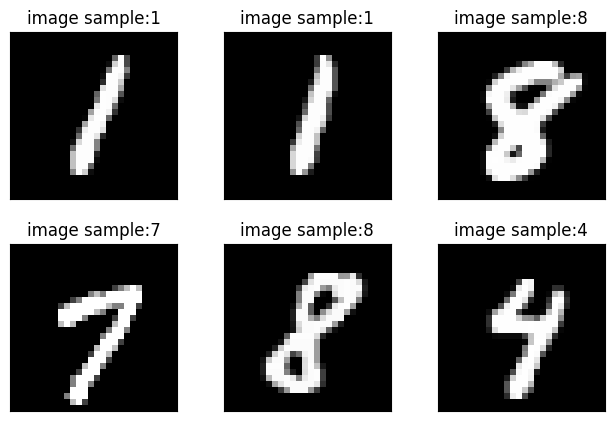

In [10]:
plot_image(x, y, 'image sample')

# 创建网络

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # xw + b
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        # x: [b, 1, 28, 28]
        # h1 = relu(xw + b)
        x = F.relu(self.fc1(x))
        # h2 = relu(h1w2 + b2)
        x = F.relu(self.fc2(x))
        # h3 = h2w3 + b3
        x = self.fc3(x)
        
        return x
    

# 训练

0 0 0.11858247220516205
0 10 0.09517006576061249
0 20 0.08536086976528168
0 30 0.07773755490779877
0 40 0.07341711223125458
0 50 0.06561213731765747
0 60 0.06525444984436035
0 70 0.05997570604085922
0 80 0.05941833183169365
0 90 0.053856659680604935
0 100 0.053021349012851715
0 110 0.051545776426792145
1 0 0.04955277591943741
1 10 0.04532192647457123
1 20 0.047132570296525955
1 30 0.044238679111003876
1 40 0.04633953422307968
1 50 0.04132802411913872
1 60 0.04445493966341019
1 70 0.04138435795903206
1 80 0.04007185250520706
1 90 0.0390358492732048
1 100 0.04047244042158127
1 110 0.03733937069773674
2 0 0.03660065680742264
2 10 0.03794937580823898
2 20 0.03648586571216583
2 30 0.036886874586343765
2 40 0.03602439910173416
2 50 0.03445831686258316
2 60 0.031926728785037994
2 70 0.03223416581749916
2 80 0.03448779508471489
2 90 0.03408625349402428
2 100 0.03323487564921379
2 110 0.03270841762423515


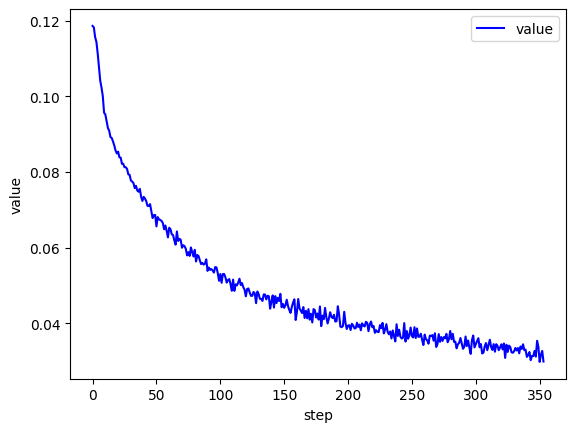

In [16]:
net = Net()
# [w1, b1, w2, b2, w3, b3]
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

train_loss = []

for epoch in range(3): # 对数据集迭代三次
    for batch_idx, (x, y) in enumerate(train_loader):
        # x: [b, 1, 28, 28], y:[512]
        # [b, 1, 28, 28] ==> [b, feature]
        x = x.view(x.size(0), 28*28)
        # ==>[b. 10]
        out = net(x)
        # [b, 10]
        y_onehot = one_hot(y)
        # loss = mse(out, y_onehot)
        loss = F.mse_loss(out, y_onehot)
        
        optimizer.zero_grad()
        loss.backward()
        # w' = w - lr*grad
        optimizer.step()
        
        train_loss.append(loss.item())
        
        if batch_idx % 10 == 0:
            print(epoch, batch_idx, loss.item())

plot_curve(train_loss)
# 得到[w1, b1. w2, b2, w3, b3]

# 准确度测试

test acc: 0.892


TypeError: imshow() missing 1 required positional argument: 'X'

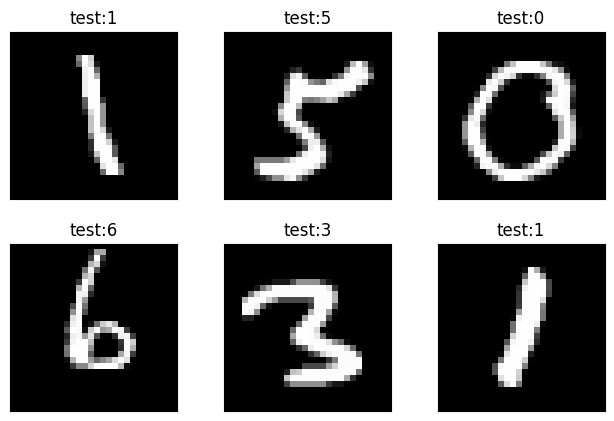

In [18]:
total_correct = 0
for x,y in test_loader:
    x = x.view(x.size(0), 28*28)
    out = net(x)
    pred = out.argmax(dim=1)
    correct = pred.eq(y).sum().float().item()
    total_correct += correct

total_num = len(test_loader.dataset)
acc = total_correct / total_num
print('test acc:',acc)

x, y = next(iter(test_loader))
out = net(x.view(x.size(0), 28*28))
pred = out.argmax(dim=1)
plot_image(x, pred, 'test')